<a href="https://colab.research.google.com/github/desaiankitb/pytorch-basics/blob/main/Linear_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch

In [2]:
import torch

In [3]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

In [4]:
def forward(x):
  y = w*x + b
  return y

In [5]:
x = torch.tensor([[2], [7], [4]])
forward(x)

tensor([[ 7.],
        [22.],
        [13.]], grad_fn=<AddBackward0>)

In [6]:
from torch.nn import Linear

In [7]:
torch.manual_seed(1)
model = Linear(in_features=1, out_features=1)
print(model.bias, model.weight)              

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [8]:
x = torch.tensor([[2.0], [3.3]])
print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)


# Linear Regression Custom Modules 
## The complete PyToarh Course 
### Deep Learning & Computer Vision 

In [9]:
import torch.nn as nn
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    pred = self.linear(x)
    return pred


In [10]:
torch.manual_seed(1)
model = LR(1, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [11]:
x = torch.tensor([[1.0], [2.0]])
print(model.forward(x))

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


# Linear Regression Creating Dataset 
## The complete PyToarh Course 
### Deep Learning & Computer Vision 

In [12]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'x')

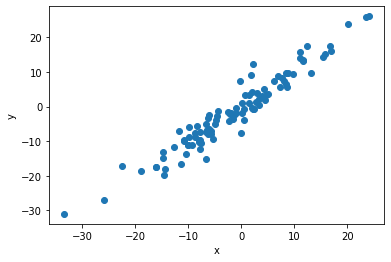

In [13]:
# creating our dataset
# X is set of random points using torch.randn
X = torch.randn(100, 1)*10
# y is added with a noise wrt X 
y = X +3*torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [14]:
# we have already defined this LR class with constructor 
# and forward method
import torch.nn as nn
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    pred = self.linear(x)
    return pred

In [15]:
torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [16]:
[w, b] = model.parameters()
print(w, b)
#.item() converts tensor to python numbers 
w1 = w[0][0].item()
b1 = b[0].item()
print(w1, b1)

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)
0.5152631998062134 -0.44137823581695557


In [17]:
# making a function for clean code
def get_params():
  return (w[0][0].item(), b[0].item())

In [18]:
import numpy as np

def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30,30])
  y1 = w1*x1 + b1
  #plots a red line
  plt.plot(x1, y1, 'r')
  #plots our data points 
  plt.scatter(X, y)
  plt.show()

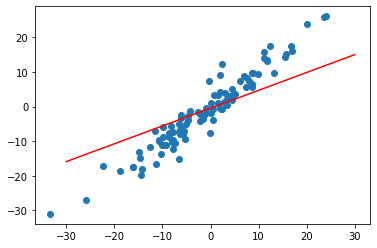

In [19]:
plot_fit('Initial Model')

# Loss Function 
## The complete PyToarh Course 
### Deep Learning & Computer Vision 

# Gradient Descent 
## The complete PyToarh Course 
### Deep Learning & Computer Vision 

# Mean Squared Error 
## The complete PyToarh Course 
### Deep Learning & Computer Vision 

# Training - Code Implementation
## The complete PyToarh Course 
### Deep Learning & Computer Vision 

In [20]:
#specify the loss function
criterion = nn.MSELoss()
#SGD converges faster than batch GD - computationally faster
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
print(model.parameters())

<generator object Module.parameters at 0x7f6e672a8e50>


In [21]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("epoch:", i, "loss:", loss.item())

  losses.append(loss)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()


epoch: 0 loss: 36.448326110839844
epoch: 1 loss: 35.36366271972656
epoch: 2 loss: 34.301639556884766
epoch: 3 loss: 33.262630462646484
epoch: 4 loss: 32.246986389160156
epoch: 5 loss: 31.255029678344727
epoch: 6 loss: 30.28704833984375
epoch: 7 loss: 29.343297958374023
epoch: 8 loss: 28.423994064331055
epoch: 9 loss: 27.529321670532227
epoch: 10 loss: 26.659423828125
epoch: 11 loss: 25.814403533935547
epoch: 12 loss: 24.99431800842285
epoch: 13 loss: 24.199180603027344
epoch: 14 loss: 23.428956985473633
epoch: 15 loss: 22.683578491210938
epoch: 16 loss: 21.962919235229492
epoch: 17 loss: 21.26681900024414
epoch: 18 loss: 20.595069885253906
epoch: 19 loss: 19.94744300842285
epoch: 20 loss: 19.323659896850586
epoch: 21 loss: 18.723411560058594
epoch: 22 loss: 18.14636993408203
epoch: 23 loss: 17.592182159423828
epoch: 24 loss: 17.060474395751953
epoch: 25 loss: 16.550857543945312
epoch: 26 loss: 16.06291961669922
epoch: 27 loss: 15.596238136291504
epoch: 28 loss: 15.150369644165039
epoch

Text(0.5, 0, 'epoch')

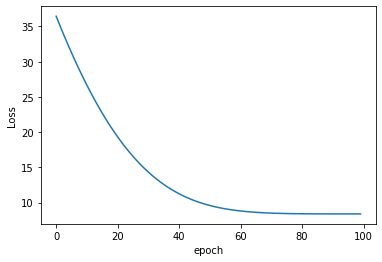

In [22]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel('epoch')

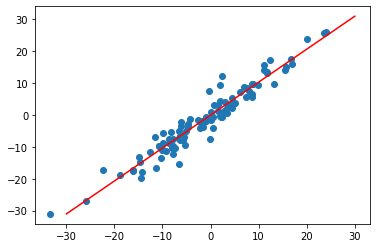

In [23]:
plot_fit("Trained Model")